 ## Contrastive PCA Analysis Results
 The goal of this notebook is to document the Contrastive PCA results on the simulated datasets.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from contrastive import CPCA
from src.models.encoders.levelbinary import LevelBinary
from src.models.encoders.levelmulti import LevelMulti

mpl.style.use('seaborn-notebook')
plt.rcParams["figure.figsize"] = (12, 9)


In [2]:
def load_data(filename):
    df = pd.read_csv(filename, index_col=0)
    ylevel = df['level'].values.copy()  
    #blexps = dfFile['blexp'].values.copy()       
    dfData = df.drop(['level', 'blexp'], axis=1).copy()
    return ylevel, dfData.values.copy()
     

C:\Users\Michael\Anaconda3\envs\data\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


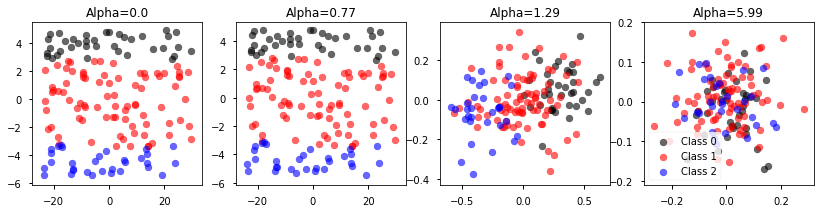

In [3]:
_, Xback = load_data('./data/processed/ds0001-filtered-background.csv')
ydata, Xdata = load_data('./data/processed/ds0001-filtered-train.csv')
ylabels = LevelMulti(targetmin=0.2, targetmax=0.8).transform(ydata.copy())

cpca = CPCA()
Xpca = cpca.fit_transform(Xdata, Xback, plot=True, active_labels=ylabels, n_alphas=10, max_log_alpha=1, n_alphas_to_return=4)


C:\Users\Michael\Anaconda3\envs\data\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


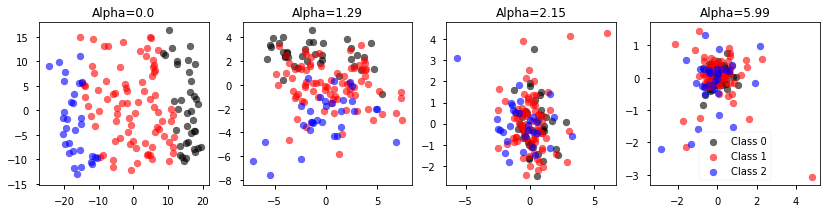

In [4]:
_, Xback = load_data('./data/processed/ds0001-baseline-background.csv')
ydata, Xdata = load_data('./data/processed/ds0001-baseline-train.csv')
ylabels = LevelMulti(targetmin=0.2, targetmax=0.8).transform(ydata.copy())

cpca = CPCA()
Xpca = cpca.fit_transform(Xdata, Xback, plot=True, active_labels=ylabels, n_alphas=10, max_log_alpha=1, n_alphas_to_return=4)
